In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv('911.csv')
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1.0
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1.0
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1.0
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1.0
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17022 entries, 0 to 17021
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        17022 non-null  float64
 1   lng        17022 non-null  float64
 2   desc       17022 non-null  object 
 3   zip        14806 non-null  float64
 4   title      17022 non-null  object 
 5   timeStamp  17022 non-null  object 
 6   twp        17014 non-null  object 
 7   addr       16906 non-null  object 
 8   e          17021 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.2+ MB


In [7]:
df.isnull().sum()

lat             0
lng             0
desc            0
zip          2216
title           0
timeStamp       0
twp             8
addr          116
e               1
dtype: int64

In [8]:
df=df.drop(['zip'],axis=1)

In [9]:
df.isnull().sum()

lat            0
lng            0
desc           0
title          0
timeStamp      0
twp            8
addr         116
e              1
dtype: int64

In [10]:
df=df.drop(['addr'],axis=1)

In [11]:
df.isnull().sum()

lat          0
lng          0
desc         0
title        0
timeStamp    0
twp          8
e            1
dtype: int64

In [12]:
df=df.dropna()

In [13]:
df.isnull().sum()

lat          0
lng          0
desc         0
title        0
timeStamp    0
twp          0
e            0
dtype: int64

In [14]:
df=df.drop(['e'],axis=1)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17013 entries, 0 to 17020
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        17013 non-null  float64
 1   lng        17013 non-null  float64
 2   desc       17013 non-null  object 
 3   title      17013 non-null  object 
 4   timeStamp  17013 non-null  object 
 5   twp        17013 non-null  object 
dtypes: float64(2), object(4)
memory usage: 930.4+ KB


In [16]:
df['title'].nunique()

84

In [17]:
x=df['title'].iloc[0]
x

'EMS: BACK PAINS/INJURY'

In [18]:
x.split(':')[0]

'EMS'

In [19]:
df['Reason'] = df['title'].apply(lambda title: str(title).split(':')[0])

In [20]:
df['Reason'].value_counts()

EMS        8247
Traffic    6393
Fire       2373
Name: Reason, dtype: int64

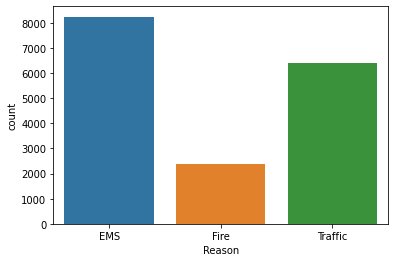

In [21]:
sns.countplot(x='Reason',data=df)

In [22]:
type(df['timeStamp'].iloc[0])

str

In [23]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [24]:
# Hour, Month, and Day of Week
df['Hour']=df['timeStamp'].apply(lambda time:time.hour)
df['Month']=df['timeStamp'].apply(lambda time:time.month)
df['DayofWeek']=df['timeStamp'].apply(lambda time:time.dayofweek)

In [25]:
df['Month'].value_counts()

1     9050
12    7963
Name: Month, dtype: int64

In [26]:
df['DayofWeek'].value_counts()

1    2701
4    2612
2    2518
5    2439
3    2413
0    2408
6    1922
Name: DayofWeek, dtype: int64

In [27]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['DayofWeek'] = df['DayofWeek'].map(dmap)

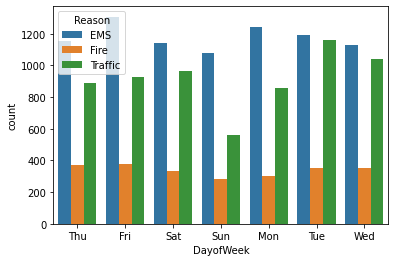

In [28]:
sns.countplot(x='DayofWeek',data=df,hue='Reason')

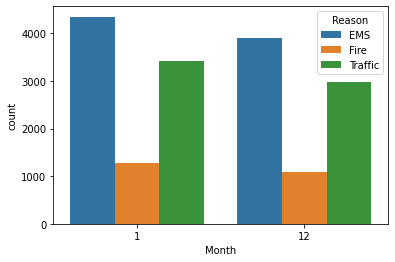

In [29]:
sns.countplot(x='Month',data=df,hue='Reason')

In [30]:
df

,lat,lng,desc,title,timeStamp,twp,Reason,Hour,Month,DayofWeek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,EMS,17,12,Thu
...,...,...,...,...,...,...,...,...,...,...
17016,40.102227,-75.391544,VALLEY FORGE RD & GENERAL STEUBEN RD; UPPER M...,EMS: HEAD INJURY,2016-01-23 13:27:00,UPPER MERION,EMS,13,1,Sat
17017,40.294356,-75.388541,KINGSCOTE DR & HARCOURT LN; FRANCONIA; Statio...,EMS: CVA/STROKE,2016-01-23 13:27:01,FRANCONIA,EMS,13,1,Sat
17018,39.986694,-75.256963,CITY AVE & HOLLINGSWORTH RD; LOWER MERION; St...,EMS: FALL VICTIM,2016-01-23 13:27:01,LOWER MERION,EMS,13,1,Sat
17019,40.294356,-75.388541,KINGSCOTE DR & HARCOURT LN; FRANCONIA; 2016-01...,Fire: FIRE SPECIAL SERVICE,2016-01-23 13:31:00,FRANCONIA,Fire,13,1,Sat


In [31]:
byMonth=df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,title,timeStamp,twp,Reason,Hour,DayofWeek
Month,,,,,,,,,
1,9050,9050,9050,9050,9050,9050,9050,9050,9050
12,7963,7963,7963,7963,7963,7963,7963,7963,7963


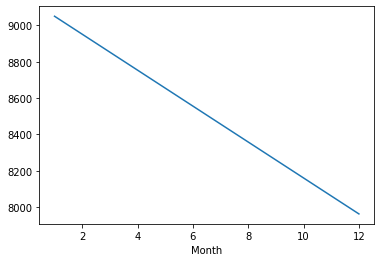

In [32]:
byMonth['twp'].plot()

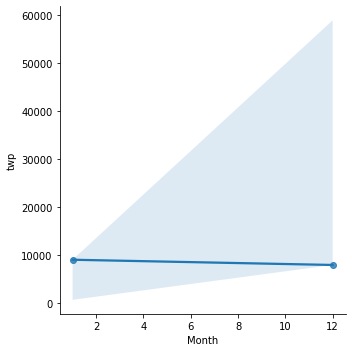

In [33]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

In [34]:
df['Date']=df['timeStamp'].apply(lambda t:t.date())

In [35]:
bydate=df.groupby('Date').count()
bydate.head()

,lat,lng,desc,title,timeStamp,twp,Reason,Hour,Month,DayofWeek
Date,,,,,,,,,,
2015-12-10,115,115,115,115,115,115,115,115,115,115
2015-12-11,395,395,395,395,395,395,395,395,395,395
2015-12-12,403,403,403,403,403,403,403,403,403,403
2015-12-13,319,319,319,319,319,319,319,319,319,319
2015-12-14,446,446,446,446,446,446,446,446,446,446


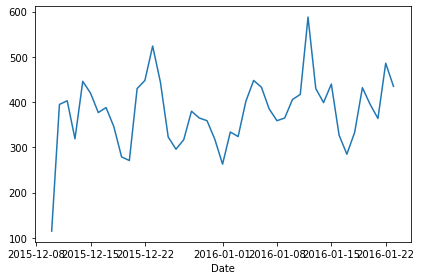

In [36]:
bydate['twp'].plot()
plt.tight_layout()

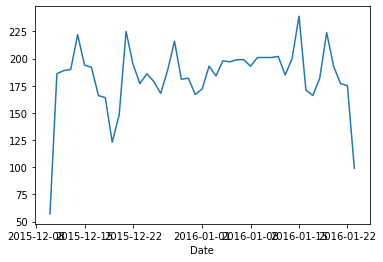

In [37]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()

In [38]:
dayhour=df.groupby(by=['Hour','DayofWeek']).count()['Reason'].unstack()
dayhour.head()

DayofWeek,Fri,Mon,Sat,Sun,Thu,Tue,Wed
Hour,,,,,,,
0,49,56,66,62,52,30,42
1,38,39,50,44,39,37,36
2,45,35,47,49,39,33,36
3,32,29,67,44,25,23,44
4,47,30,41,41,29,38,26


<Figure size 864x432 with 0 Axes>

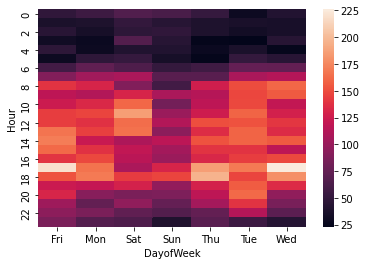

<Figure size 864x432 with 0 Axes>

In [39]:
sns.heatmap(data=dayhour)
plt.figure(figsize=(12,6))

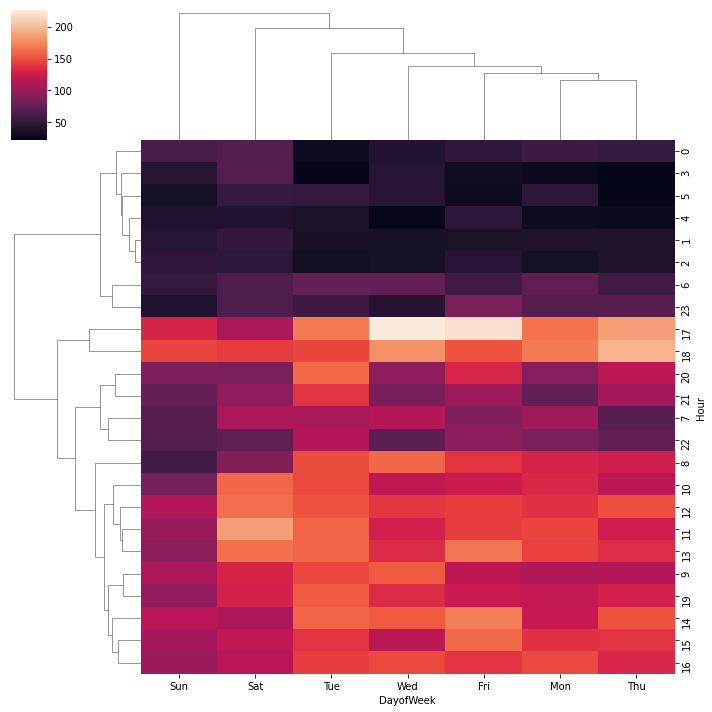

In [40]:
sns.clustermap(data=dayhour)

In [41]:
daymonth=df.groupby(by=['Month','DayofWeek']).count()['Reason'].unstack()
daymonth.head()

DayofWeek,Fri,Mon,Sat,Sun,Thu,Tue,Wed
Month,,,,,,,
1,1548,1152,1461,1015,1148,1468,1258
12,1064,1256,978,907,1265,1233,1260


<Figure size 864x432 with 0 Axes>

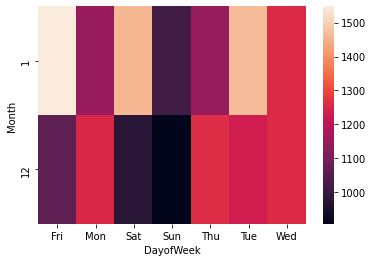

<Figure size 864x432 with 0 Axes>

In [42]:
sns.heatmap(data=daymonth)
plt.figure(figsize=(12,6))